# Problem Statement

#### This is the data of Income evaluation for different countries. Based on the available features, build a model to predict whether a person's income exceeds a certain threshold (e.g., <=50K or >50K), Which will help to identify the factors that contribute to higher incomes.

In [404]:
#important libraries
#importing the necessary packages
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from scipy.stats import sem
import string
import matplotlib.style
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline

In [405]:
income_df1=pd.read_csv(r'D:\Learnbay\Project\Data_inc.csv', sep=',')
income_df1.head(10)

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,NaN
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,NaN
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,NaN
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,NaN
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,NaN


In [406]:
#let's get in to the data information with datatypes
income_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

### As Unnamed: 15 has only 2 values so we can drop the column


In [407]:
income_df=income_df1.drop(['Unnamed: 15'], axis=1)

# Data Dictionary

### Age: The age of an employee
### Work-class: Profession category 
### Final_census : Census(population of the country)
### Education: Type of last (max) Education
### Education_num: Years spend on studies
### Marital Status: Person married or not
### Occupation: Person 
### Relationship: Bounded by any relation or dependent 
### Race: which ethnicity belongs to the employee 
### Gender: gender of the employee
### Capital-gain: Capital gain refers to the profit earned when selling a capital asset, such as stocks, real estate, or valuable possessions. It represents the difference between the selling price of the asset and its original purchase price.
### Capital-loss: Capital loss refers to the financial loss incurred when selling a capital asset at a price lower than its original purchase price. It represents the negative difference between the selling price and the purchase price of the asset.
### Hours/week : How many working hours in a week
### Country : Country where it belongs
### Income threshold(Target Column) : two range of Income one is <=50k and >50K

In [408]:
#Let us check out the individual data types
income_df.dtypes

Age                  int64
Profession Class    object
Final_census         int64
 Education          object
 Education-num       int64
 marital-status     object
 occupation         object
 relationship       object
 race               object
Gender              object
 capital-gain        int64
 capital-loss        int64
 hours-per-week      int64
 country            object
 income             object
dtype: object

In [409]:
income_df.rename(columns={' income' : 'y'}, inplace = True)
income_df.head(1)

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [410]:
#Let's extract all the categorical and the numerical columns for the further Analysis
df_categorical=income_df.select_dtypes(object)
df_numerical=income_df.select_dtypes(include=np.number)

In [411]:
print("The number of categorical columns is: ",len(df_categorical.columns))
print(list(df_categorical.columns))

The number of categorical columns is:  9
['Profession Class', ' Education', ' marital-status', ' occupation', ' relationship', ' race', 'Gender', ' country', 'y']


In [412]:
print("The number of numerical columns is: ",len(df_numerical.columns))
print(list(df_numerical.columns))

The number of numerical columns is:  6
['Age', 'Final_census', ' Education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


# Data Pre Processing Exploratory Data Analysis :

In [413]:
#Lets check the null values
number_of_missing_values=income_df.isna().sum().sort_values(ascending=True)
percentage_of_missing_values=((income_df.isna().sum()/income_df.count())*100).sort_values(ascending=True)
missing_data=pd.concat([number_of_missing_values,percentage_of_missing_values], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Age,0,0.0
Profession Class,0,0.0
Final_census,0,0.0
Education,0,0.0
Education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
Gender,0,0.0


## OBSERVATION : We can clearly observe from the above cell there are no missing value present in any attribute.

In [414]:
#Summerization of the numerical column
income_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Final_census,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


***capital-gain*** and ***capital-loss*** has a mean value which is a lot greater than the median value, therefore it suggests that there is postive skewness , which is a feature due to influence of potential outliers.

In [415]:
#Summarization of the categorical columns:
# % Values in each categorical columns in the dataset
categorical_columns=df_categorical.columns
for i in categorical_columns:
    print("% value in column : ", i)
    print((income_df[i].value_counts()/len(income_df[i])*100))

% value in column :  Profession Class
 Private             69.703019
 Self-emp-not-inc     7.803814
 Local-gov            6.427935
 ?                    5.638647
 State-gov            3.986364
 Self-emp-inc         3.427413
 Federal-gov          2.948312
 Without-pay          0.042996
 Never-worked         0.021498
Name: Profession Class, dtype: float64
% value in column :   Education
 HS-grad         32.250238
 Some-college    22.391818
 Bachelors       16.446055
 Masters          5.291607
 Assoc-voc        4.244341
 11th             3.608612
 Assoc-acdm       3.276926
 10th             2.865391
 7th-8th          1.983969
 Prof-school      1.768987
 9th              1.578576
 12th             1.329812
 Doctorate        1.268389
 5th-6th          1.022696
 1st-4th          0.515955
 Preschool        0.156629
Name:  Education, dtype: float64
% value in column :   marital-status
 Married-civ-spouse       45.993673
 Never-married            32.809189
 Divorced                 13.645158
 S

# Univariate Analysis :

### Analyse categorical columns :

In [416]:
categorical_columns

Index(['Profession Class', ' Education', ' marital-status', ' occupation',
       ' relationship', ' race', 'Gender', ' country', 'y'],
      dtype='object')

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

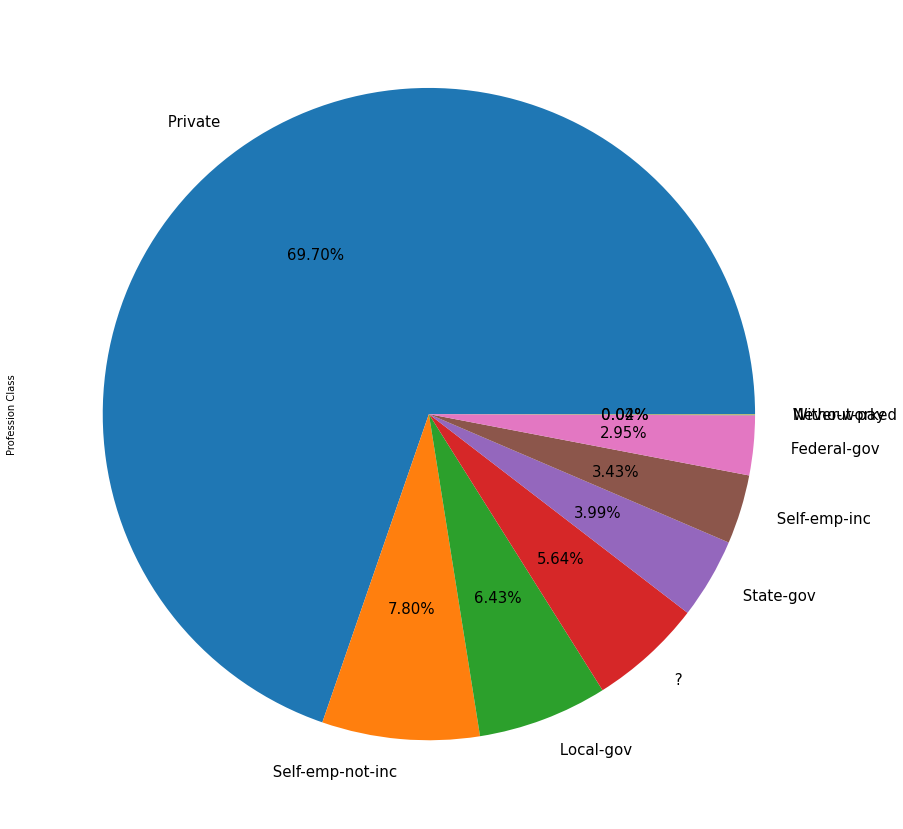

In [417]:
#univariate analysis of profession class
print(income_df['Profession Class'].value_counts())
income_df['Profession Class'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(20,15),fontsize=15)
plt.show

### Observation
From the above piechart we can clearly infer that there are most profession class are private almost 22696 people are private. Then Self-emp-not-inc and Local-gov job holders are almost 2500 and 2000 respectively, and never worked is the least.

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  Education, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

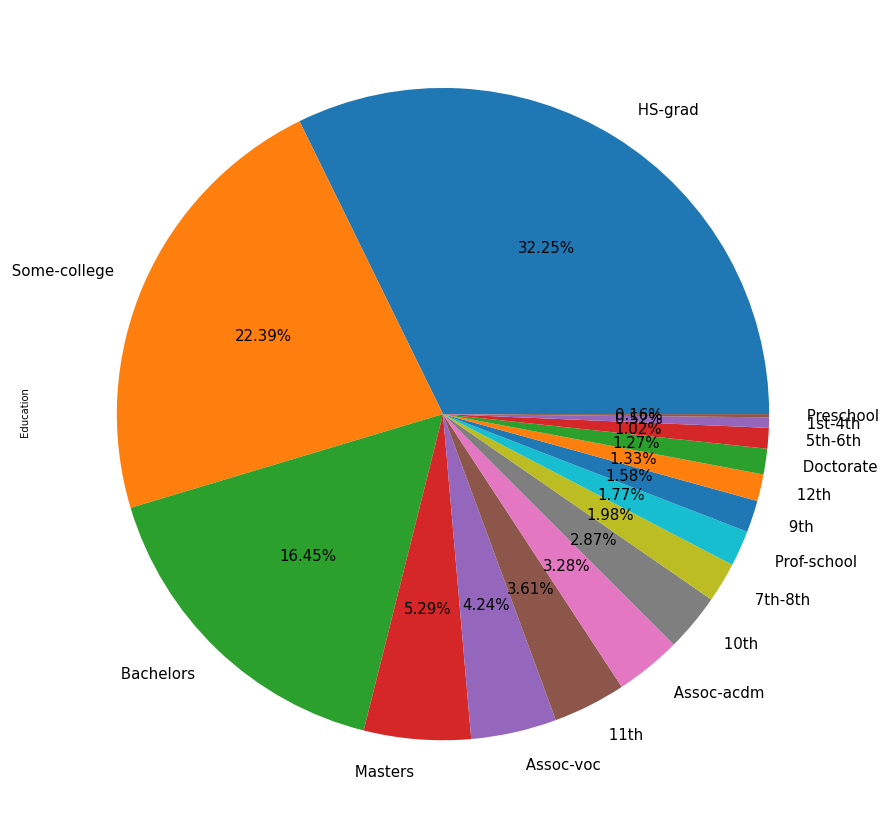

In [418]:
#univariate analysis of Education
print(income_df[' Education'].value_counts())
income_df[' Education'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(20,15),fontsize=15)
plt.show

### Observation
From the above piechart we can clearly infer that there are most of the people are either Hs-grade or went to some college or are bachelors

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

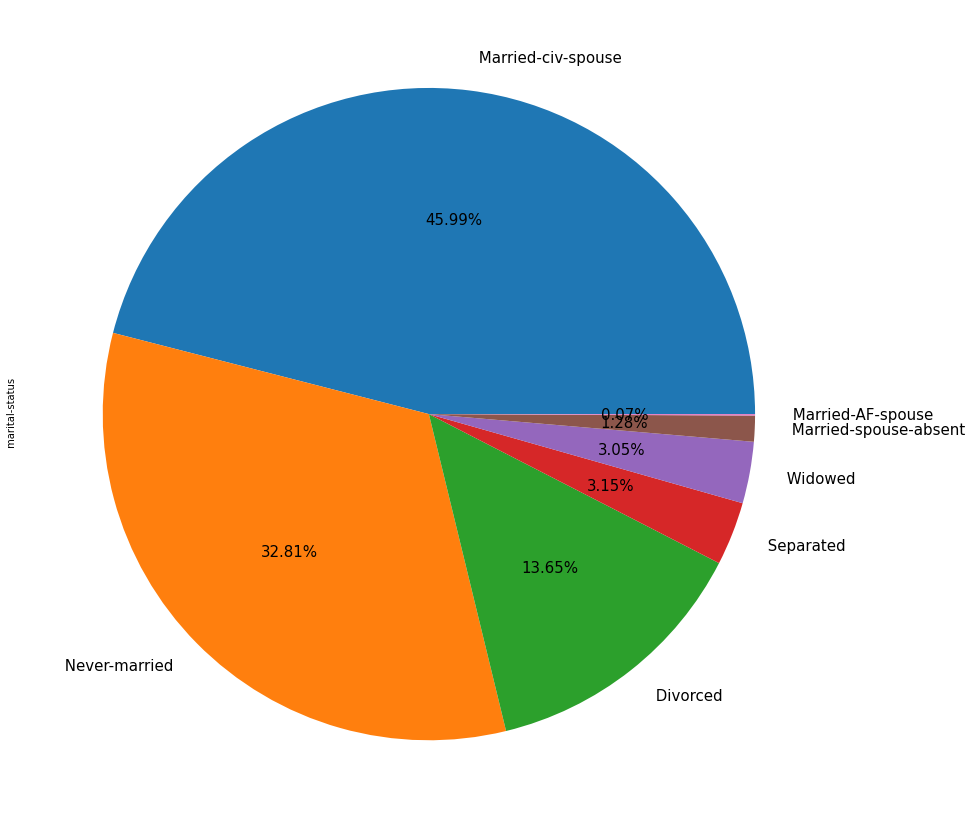

In [419]:
#univariate analysis of marital-status
print(income_df[' marital-status'].value_counts())
income_df[' marital-status'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(20,15),fontsize=15)
plt.show

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

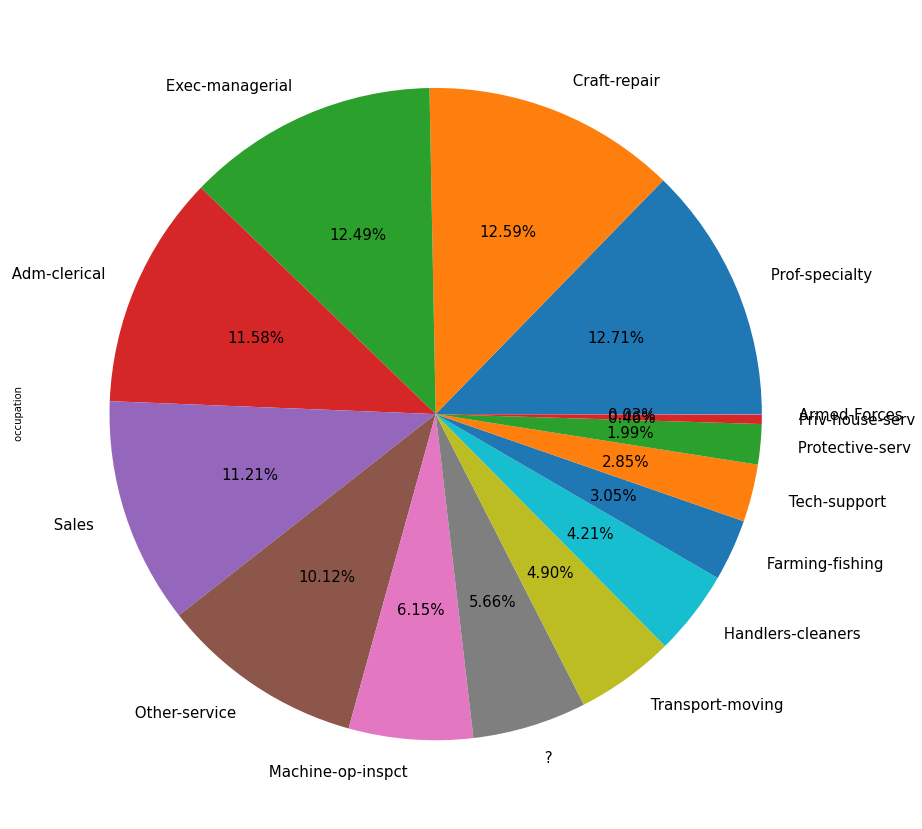

In [420]:
#univariate analysis of occupation
print(income_df[' occupation'].value_counts())
income_df[' occupation'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(20,15),fontsize=15)
plt.show

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name:  relationship, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

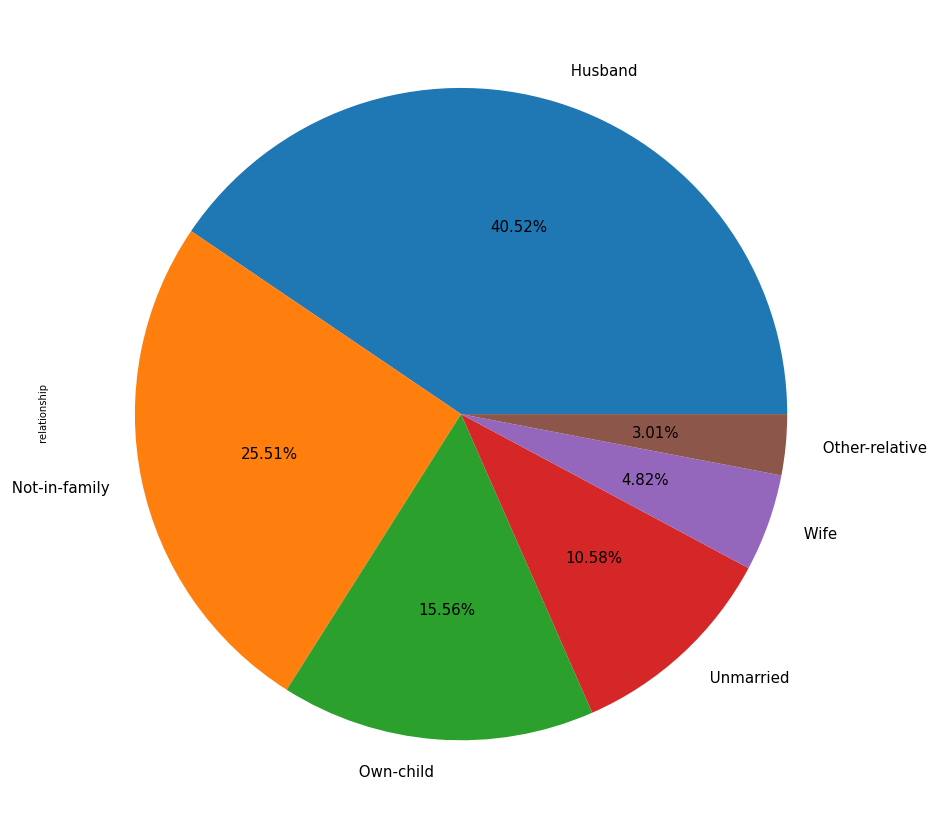

In [421]:
#univariate analysis of relationship
print(income_df[' relationship'].value_counts())
income_df[' relationship'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(20,15),fontsize=15)
plt.show

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  race, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

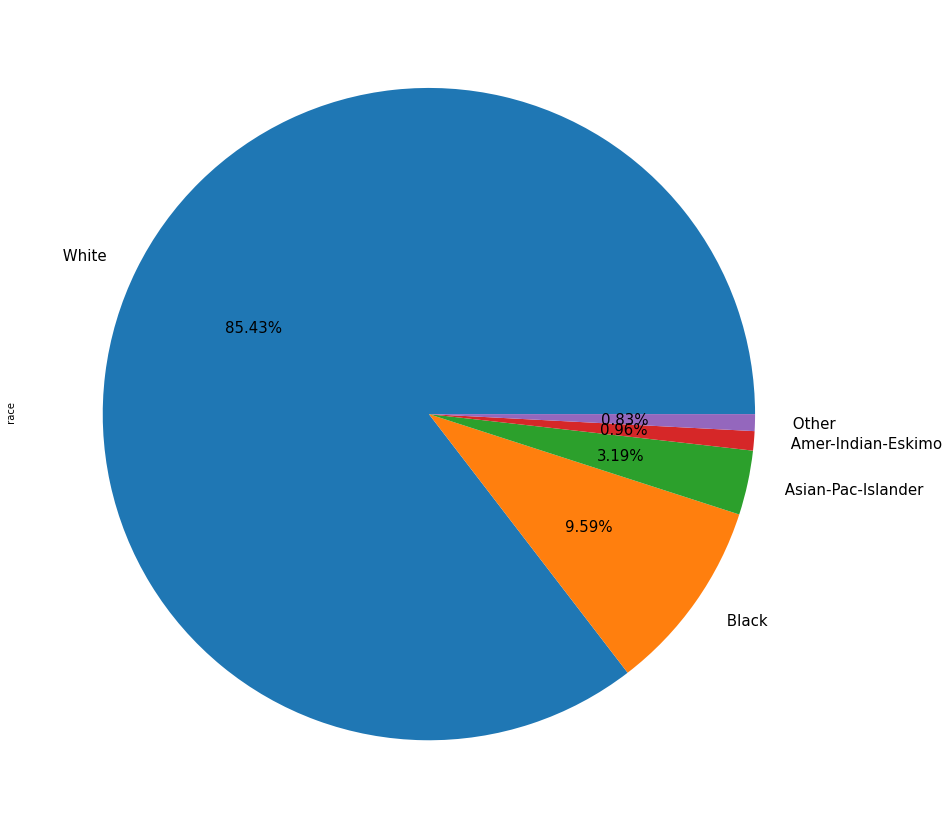

In [422]:
#univariate analysis of race
print(income_df[' race'].value_counts())
income_df[' race'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(20,15),fontsize=15)
plt.show

 Male      66.920549
 Female    33.079451
Name: Gender, dtype: float64


Text(0, 0.5, 'count')

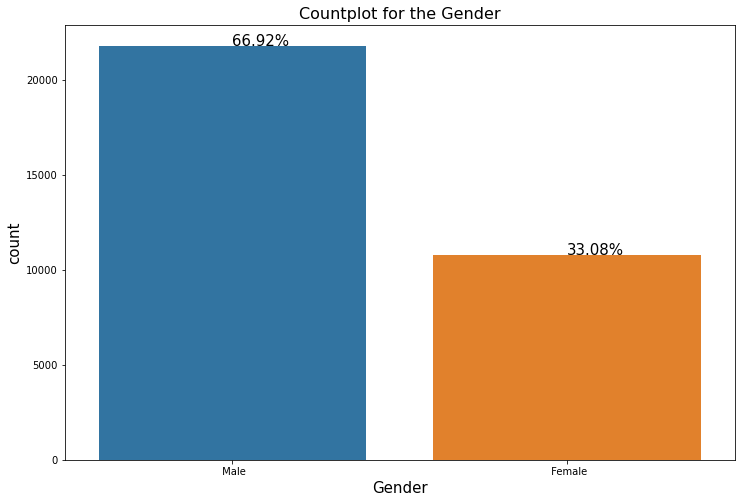

In [423]:
#univariate analysis of Gender
print(income_df['Gender'].value_counts()/income_df['Gender'].count()*100)
plt.figure(figsize=(12,8))
sns.countplot(income_df['Gender'])
plt.text(x=1,y=income_df['Gender'].value_counts()[1]+1,s='33.08%',fontsize=15)
plt.text(x=0,y=income_df['Gender'].value_counts()[0]+1,s='66.92%',fontsize=15)
plt.title('Countplot for the Gender',fontsize=16)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('count',fontsize=15)

 United-States                 89.585701
 Mexico                         1.974755
 ?                              1.790486
 Philippines                    0.608089
 Germany                        0.420749
 Canada                         0.371610
 Puerto-Rico                    0.350112
 El-Salvador                    0.325543
 India                          0.307116
 Cuba                           0.291760
 England                        0.276404
 Jamaica                        0.248764
 South                          0.245693
 China                          0.230337
 Italy                          0.224195
 Dominican-Republic             0.214981
 Vietnam                        0.205768
 Guatemala                      0.196554
 Japan                          0.190412
 Poland                         0.184270
 Columbia                       0.181198
 Taiwan                         0.156629
 Haiti                          0.135131
 Iran                           0.132060
 Portugal       

Text(0, 0.5, 'count')

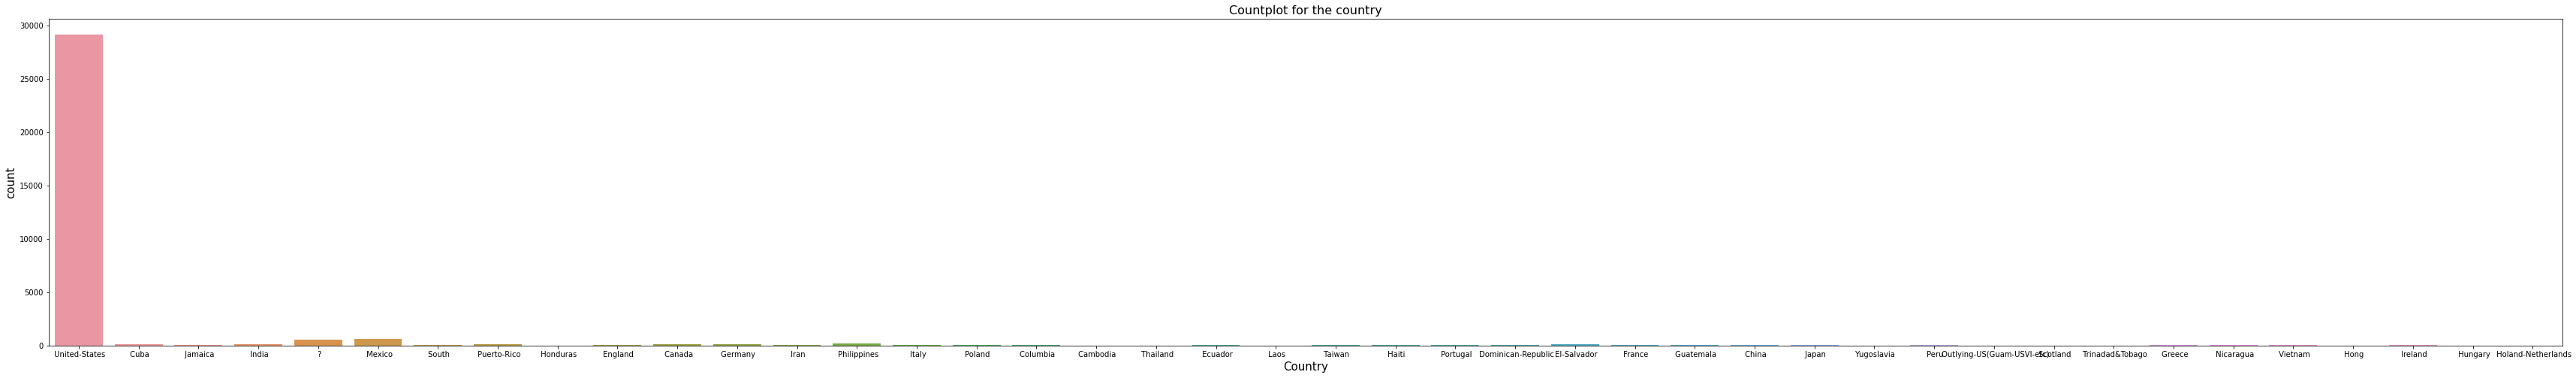

In [424]:
#univariate analysis of country
print(income_df[' country'].value_counts()/income_df[' country'].count()*100)
plt.figure(figsize=(60,8))
sns.countplot(income_df[' country'])
plt.title('Countplot for the country',fontsize=16)
plt.xlabel('Country',fontsize=15)
plt.ylabel('count',fontsize=15)

 <=50K    75.919044
 >50K     24.080956
Name: y, dtype: float64


Text(0, 0.5, 'count')

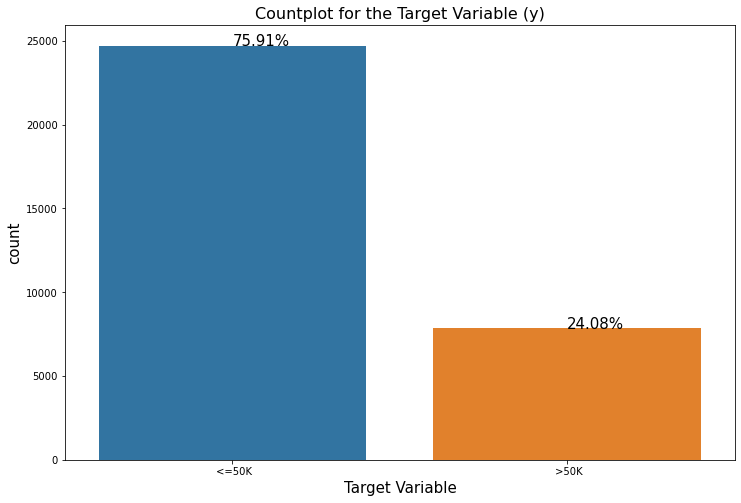

In [425]:
print(income_df['y'].value_counts()/income_df['y'].count()*100)
plt.figure(figsize=(12,8))
sns.countplot(income_df['y'])
plt.text(x=1,y=income_df['y'].value_counts()[1]+1,s='24.08%',fontsize=15)
plt.text(x=0,y=income_df['y'].value_counts()[0]+1,s='75.91%',fontsize=15)
plt.title('Countplot for the Target Variable (y)',fontsize=16)
plt.xlabel('Target Variable',fontsize=15)
plt.ylabel('count',fontsize=15)

## Univariate Analysis of our Continuous(Numarical) variable

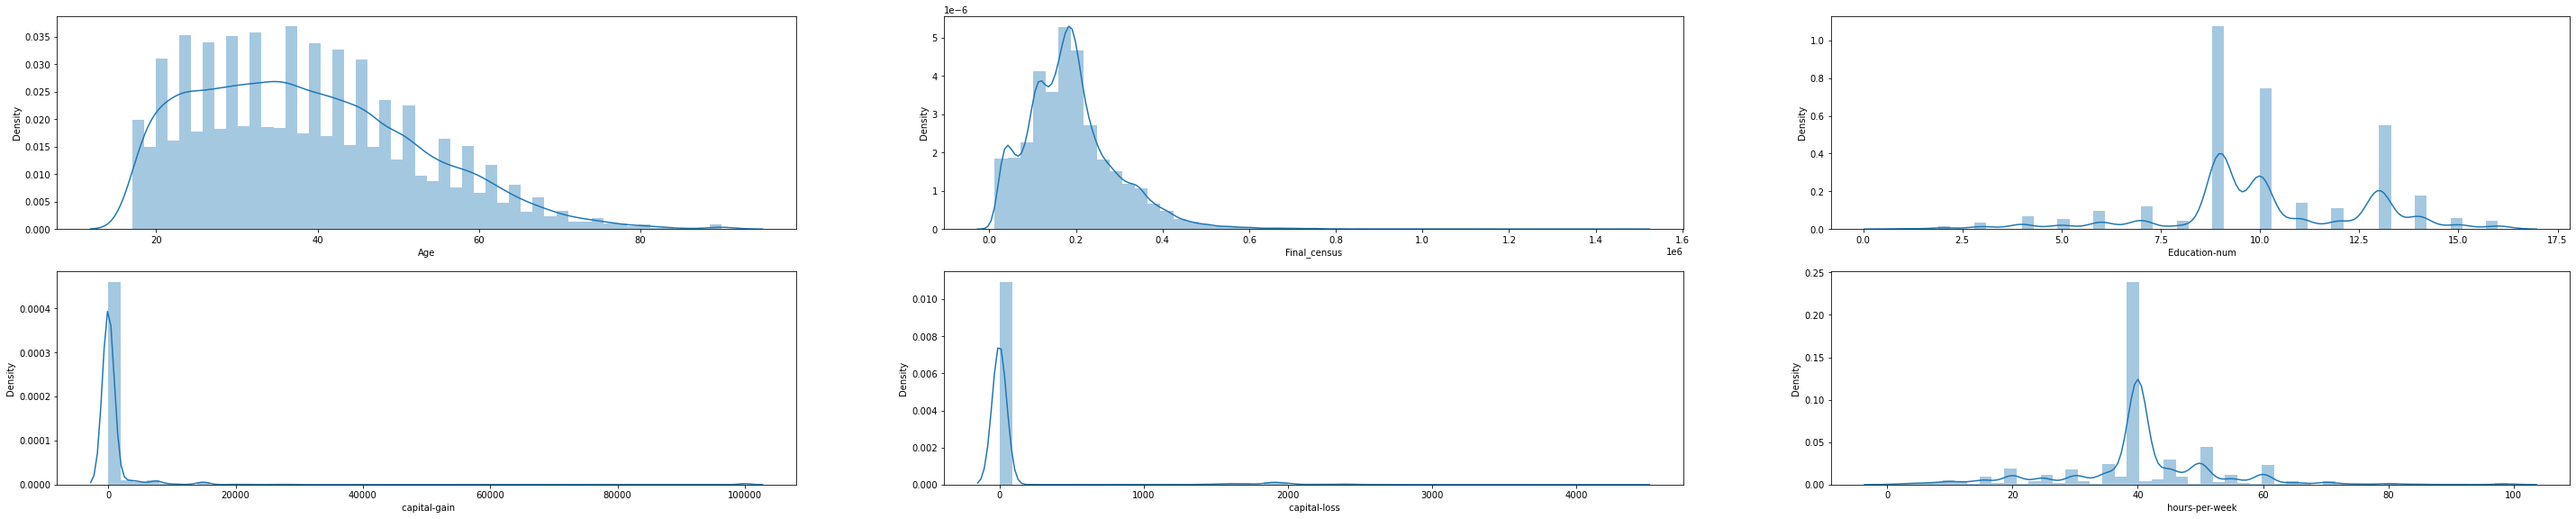

In [426]:
numerical_columns=df_numerical.columns
plt.figure(figsize=(50,20))
s=1
for p in numerical_columns:
    plt.subplot(4,3,s)
    sns.distplot(income_df[p])
    s+=1

## Bivariate Analysis of the data

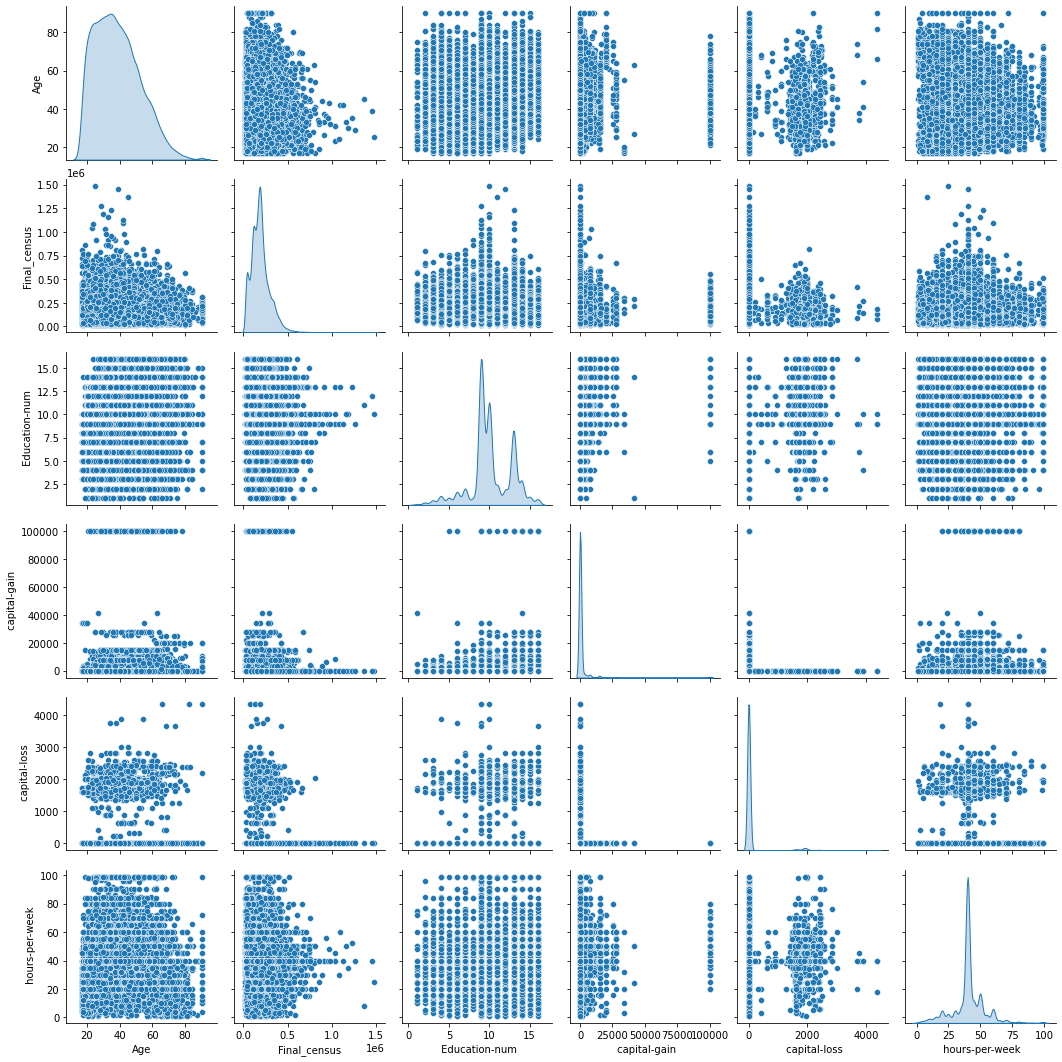

In [427]:
#starting with the pair plot
sns.pairplot(data=income_df,diag_kind='kde')

<AxesSubplot:>

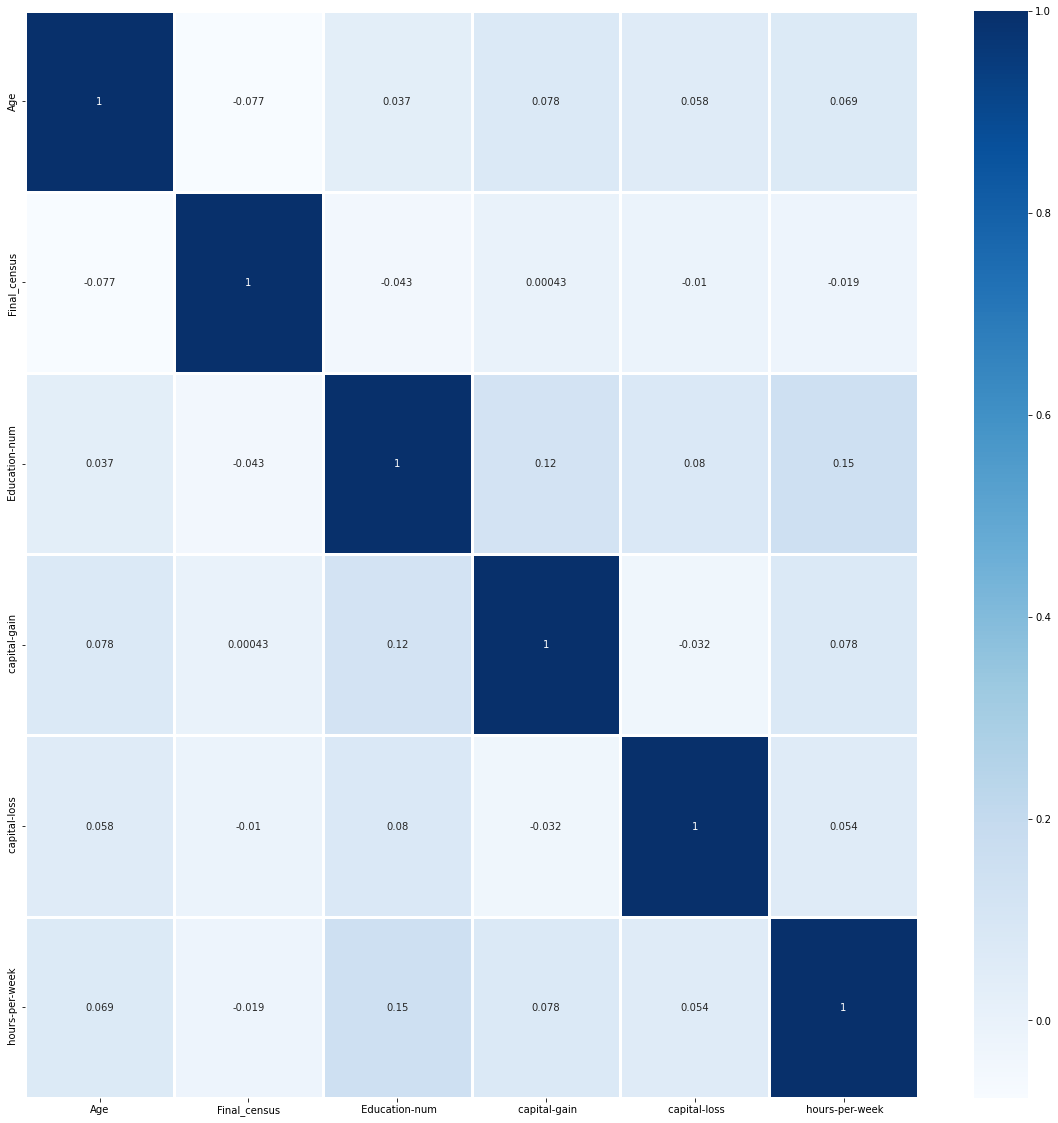

In [428]:
plt.figure(figsize=(20,20))
sns.heatmap(income_df.corr(), annot=True, linewidth=2.5, linecolor='white',cmap='Blues')

## Positive and Negative Target Analysis with attributes:

In [429]:
def barPerc(df,xVar,ax):
    
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

Bivariate analysis of Profession Class and Income
-----------------------------------------
y                   <=50K   >50K
Profession Class                
 ?                   1645    191
 Federal-gov          589    371
 Local-gov           1476    617
 Never-worked           7      0
 Private            17733   4963
 Self-emp-inc         494    622
 Self-emp-not-inc    1817    724
 State-gov            945    353
 Without-pay           14      0


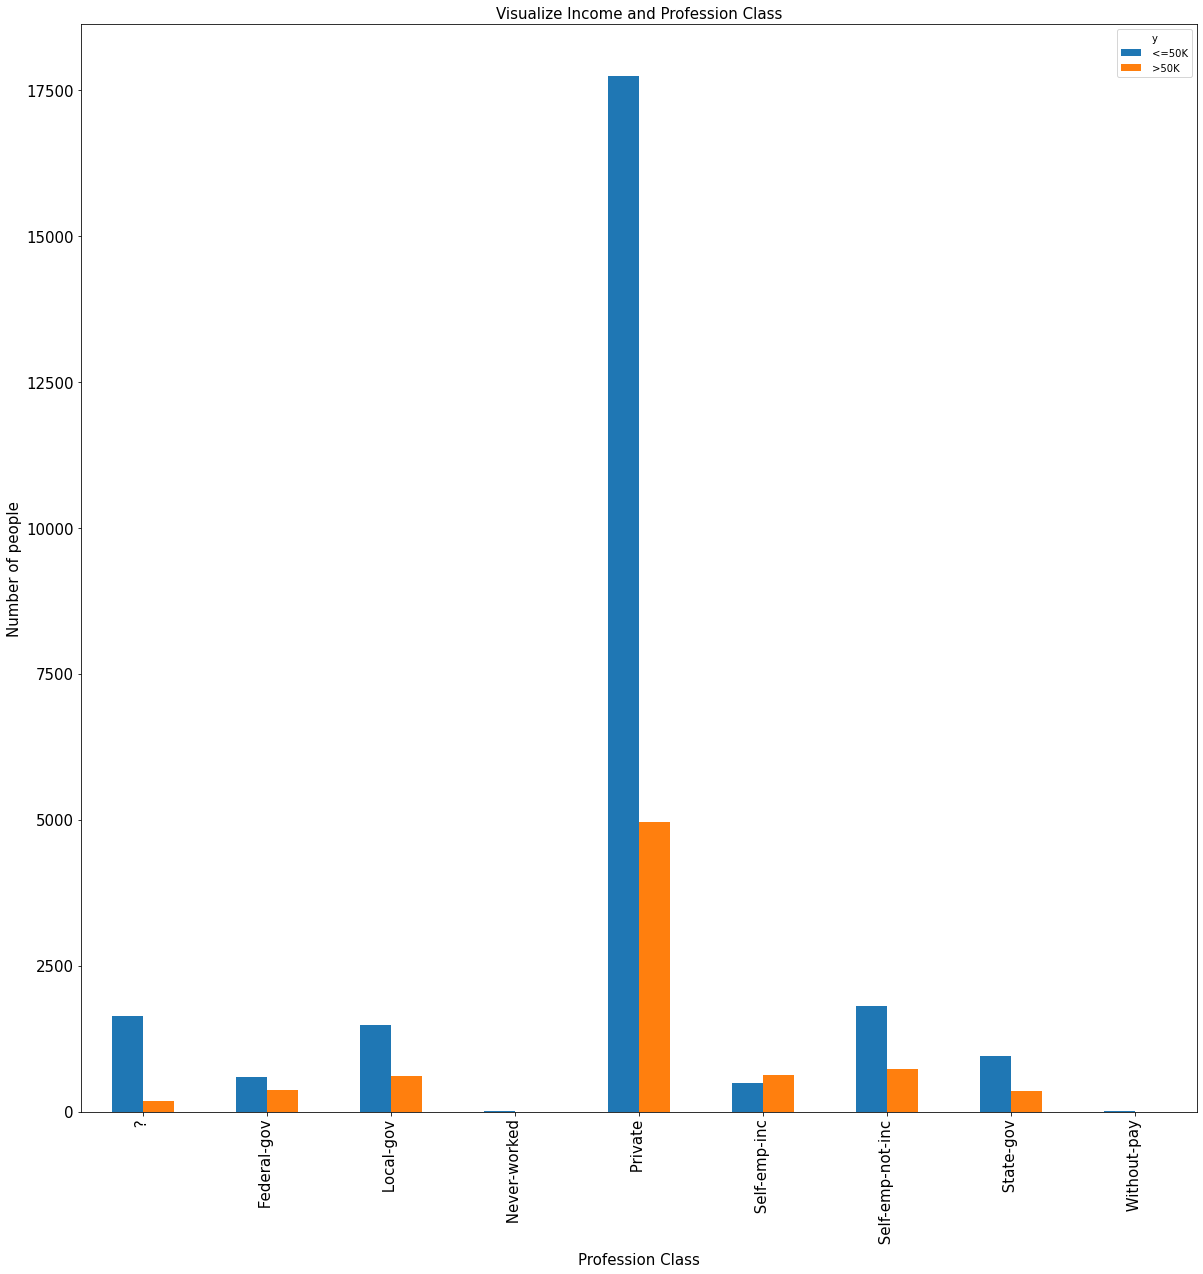

In [430]:
print('Bivariate analysis of Profession Class and Income')
print('-----------------------------------------')
print(pd.crosstab(income_df['Profession Class'],income_df['y']))
pd.crosstab(income_df['Profession Class'],income_df['y']).plot(kind='bar',fontsize=15,figsize=(20,20))
plt.title('Visualize Income and Profession Class',fontsize=15)
plt.xlabel('Profession Class',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

Bivariate analysis of education and income
-----------------------------------------
y               <=50K   >50K
 Education                  
 10th             871     62
 11th            1115     60
 12th             400     33
 1st-4th          162      6
 5th-6th          317     16
 7th-8th          606     40
 9th              487     27
 Assoc-acdm       802    265
 Assoc-voc       1021    361
 Bachelors       3134   2221
 Doctorate        107    306
 HS-grad         8826   1675
 Masters          764    959
 Preschool         51      0
 Prof-school      153    423
 Some-college    5904   1387


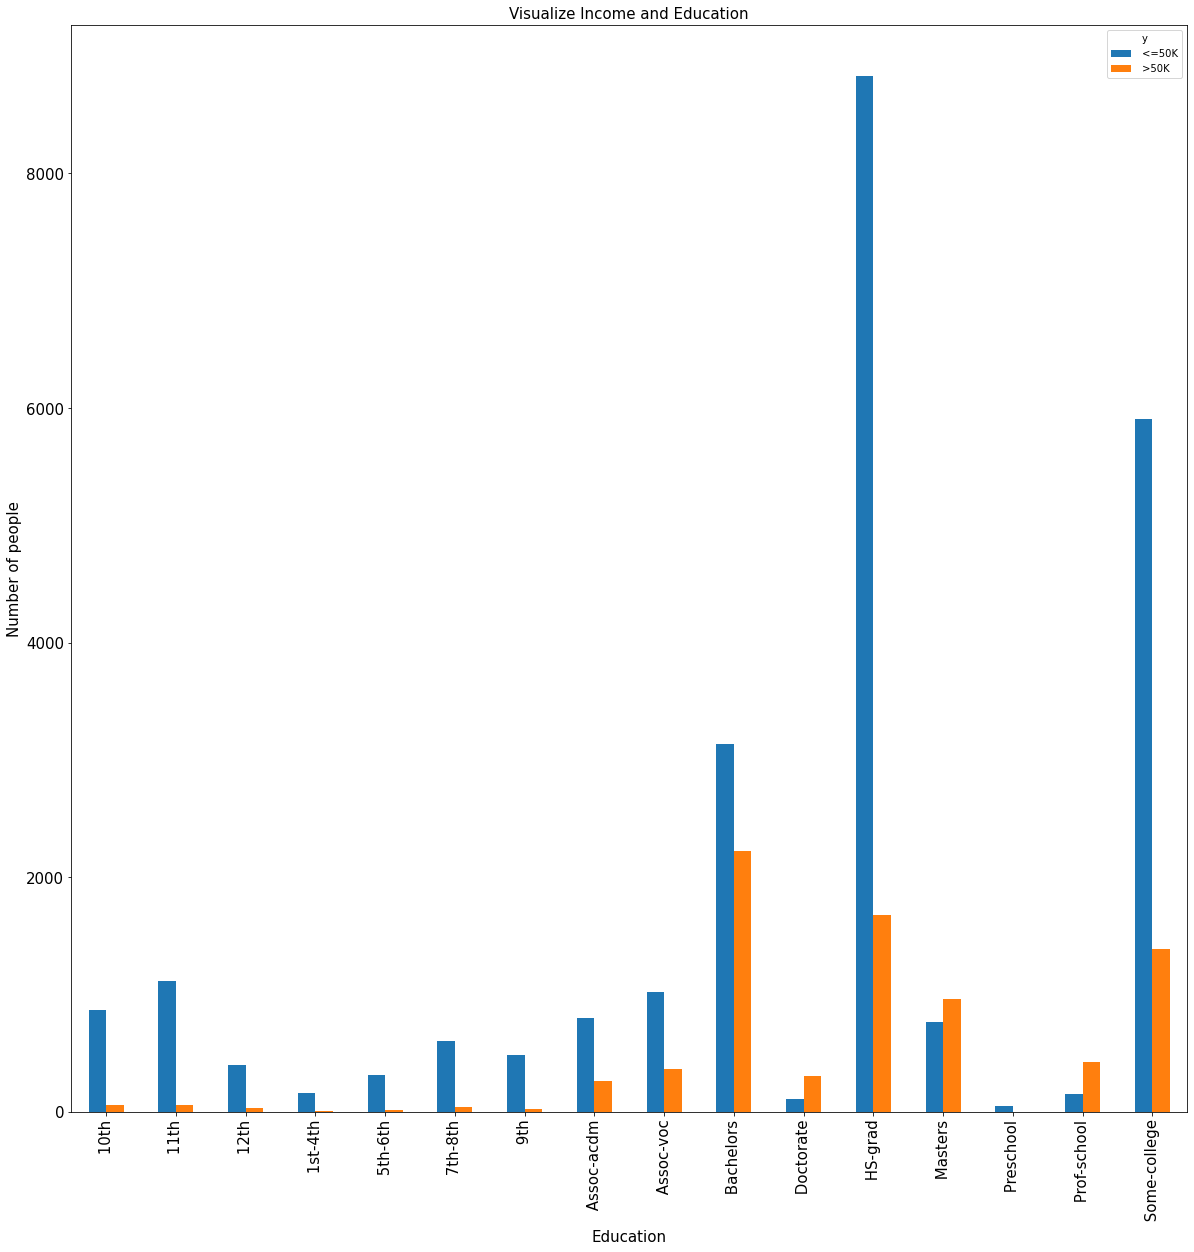

In [431]:
print('Bivariate analysis of education and income')
print('-----------------------------------------')
print(pd.crosstab(income_df[' Education'],income_df['y']))
pd.crosstab(income_df[' Education'],income_df['y']).plot(kind='bar',fontsize=15,figsize=(20,20))
plt.title('Visualize Income and Education',fontsize=15)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

Bivariate analysis of  Marital-status and Income
-----------------------------------------
y                        <=50K   >50K
 marital-status                      
 Divorced                 3980    463
 Married-AF-spouse          13     10
 Married-civ-spouse       8284   6692
 Married-spouse-absent     384     34
 Never-married           10192    491
 Separated                 959     66
 Widowed                   908     85


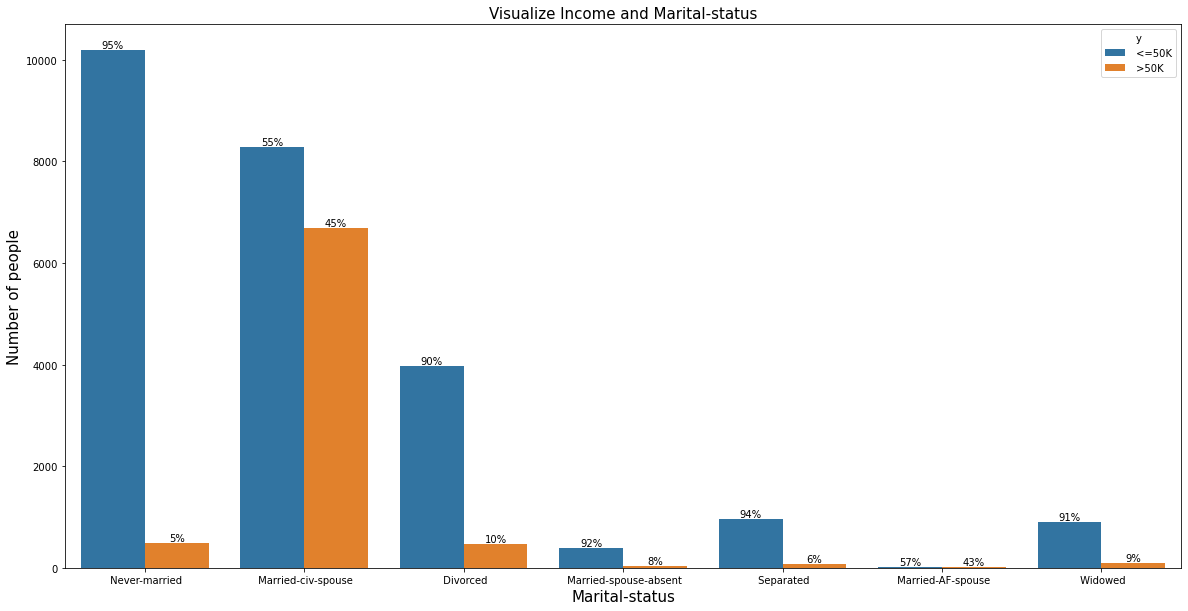

In [432]:
print('Bivariate analysis of  Marital-status and Income')
print('-----------------------------------------')
print(pd.crosstab(income_df[' marital-status'],income_df['y']))
plt.figure(figsize=(20,10))
ax=sns.countplot(x=" marital-status",hue='y',data=income_df)
barPerc(income_df,' marital-status',ax)
plt.title('Visualize Income and Marital-status',fontsize=15)
plt.xlabel('Marital-status',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

Bivariate analysis of Occupation and Income
-----------------------------------------
y                    <=50K   >50K
 occupation                      
 ?                    1652    191
 Adm-clerical         3263    507
 Armed-Forces            8      1
 Craft-repair         3170    929
 Exec-managerial      2098   1968
 Farming-fishing       879    115
 Handlers-cleaners    1284     86
 Machine-op-inspct    1752    250
 Other-service        3158    137
 Priv-house-serv       148      1
 Prof-specialty       2281   1859
 Protective-serv       438    211
 Sales                2667    983
 Tech-support          645    283
 Transport-moving     1277    320


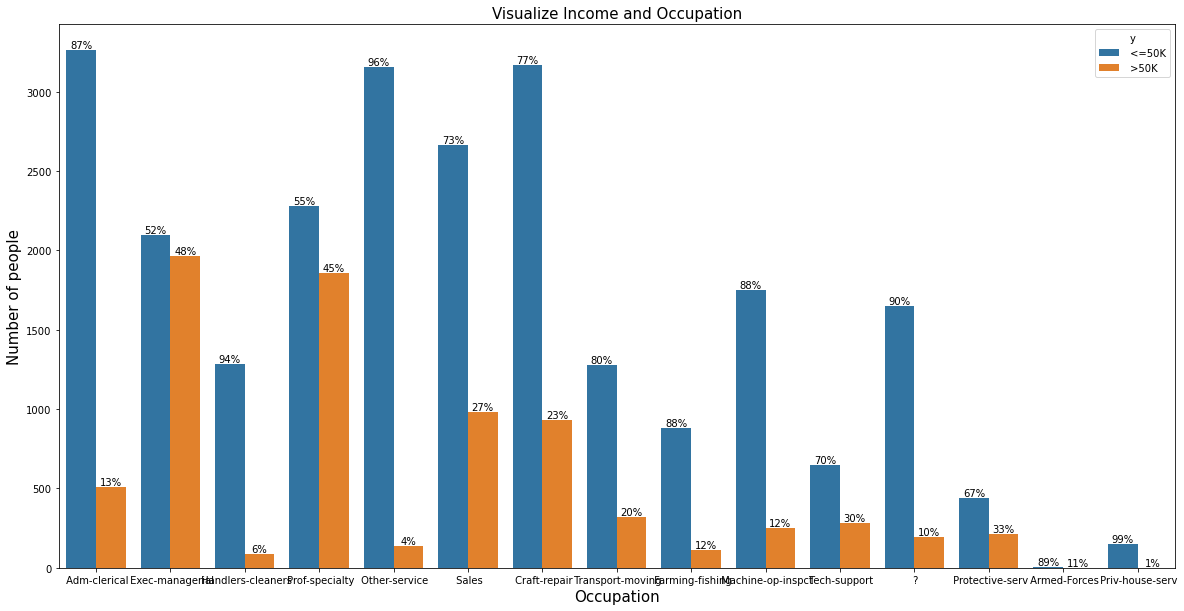

In [433]:
print('Bivariate analysis of Occupation and Income')
print('-----------------------------------------')
print(pd.crosstab(income_df[' occupation'],income_df['y']))
plt.figure(figsize=(20,10))
ax=sns.countplot(x=" occupation",hue='y',data=income_df)
barPerc(income_df,' occupation',ax)
plt.title('Visualize Income and Occupation',fontsize=15)
plt.xlabel('Occupation',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

Bivariate analysis of Relationship and Income
-----------------------------------------
y                 <=50K   >50K
 relationship                 
 Husband           7275   5918
 Not-in-family     7449    856
 Other-relative     944     37
 Own-child         5001     67
 Unmarried         3228    218
 Wife               823    745


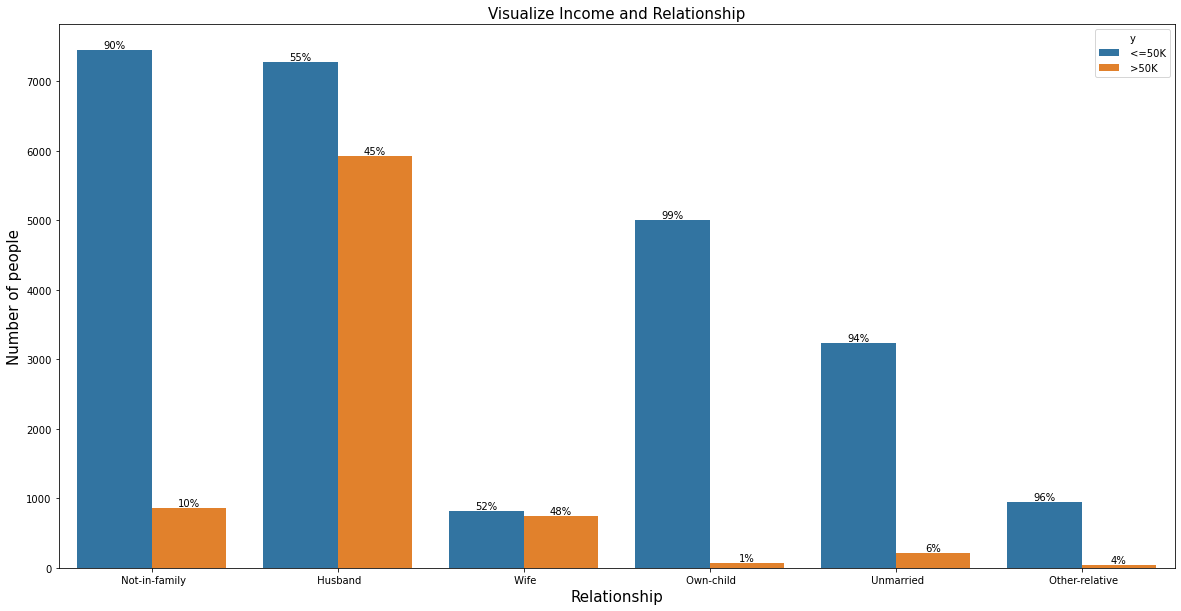

In [434]:
print('Bivariate analysis of Relationship and Income')
print('-----------------------------------------')
print(pd.crosstab(income_df[' relationship'],income_df['y']))
plt.figure(figsize=(20,10))
ax=sns.countplot(x=" relationship",hue='y',data=income_df)
barPerc(income_df,' relationship',ax)
plt.title('Visualize Income and Relationship',fontsize=15)
plt.xlabel('Relationship',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

Bivariate analysis of Race and Income
-----------------------------------------
y                     <=50K   >50K
 race                             
 Amer-Indian-Eskimo     275     36
 Asian-Pac-Islander     763    276
 Black                 2737    387
 Other                  246     25
 White                20699   7117


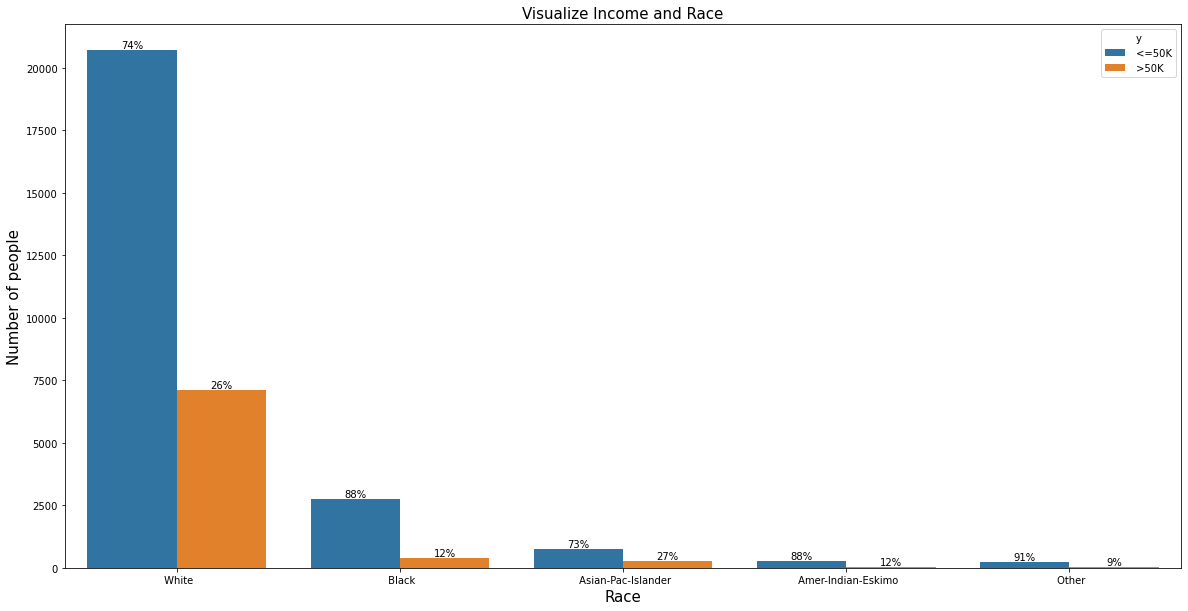

In [435]:
print('Bivariate analysis of Race and Income')
print('-----------------------------------------')
print(pd.crosstab(income_df[' race'],income_df['y']))
plt.figure(figsize=(20,10))
ax=sns.countplot(x=" race",hue='y',data=income_df)
barPerc(income_df,' race',ax)
plt.title('Visualize Income and Race',fontsize=15)
plt.xlabel('Race',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

Bivariate analysis of Gender and Income
-----------------------------------------
y         <=50K   >50K
Gender                
 Female    9592   1179
 Male     15128   6662


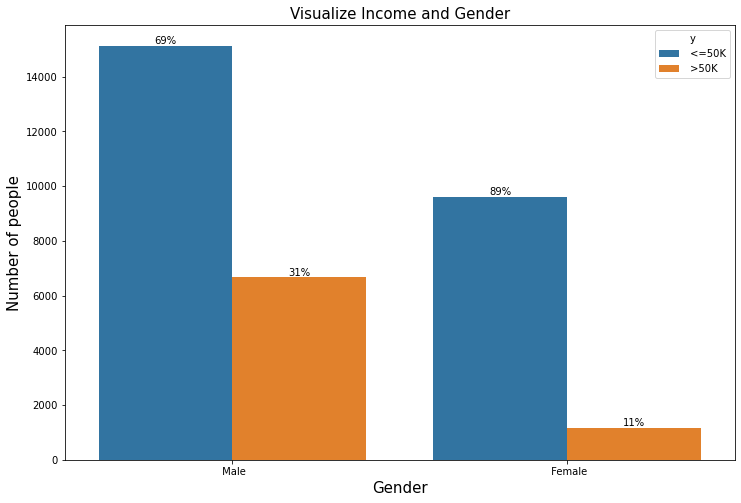

In [436]:
print('Bivariate analysis of Gender and Income')
print('-----------------------------------------')
print(pd.crosstab(income_df['Gender'],income_df['y']))
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Gender",hue='y',data=income_df)
barPerc(income_df,'Gender',ax)
plt.title('Visualize Income and Gender',fontsize=15)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

Bivariate analysis of Country and Income
-----------------------------------------
y                             <=50K   >50K
 country                                  
 ?                              437    146
 Cambodia                        12      7
 Canada                          82     39
 China                           55     20
 Columbia                        57      2
 Cuba                            70     25
 Dominican-Republic              68      2
 Ecuador                         24      4
 El-Salvador                     97      9
 England                         60     30
 France                          17     12
 Germany                         93     44
 Greece                          21      8
 Guatemala                       61      3
 Haiti                           40      4
 Holand-Netherlands               1      0
 Honduras                        12      1
 Hong                            14      6
 Hungary                         10      3
 India        

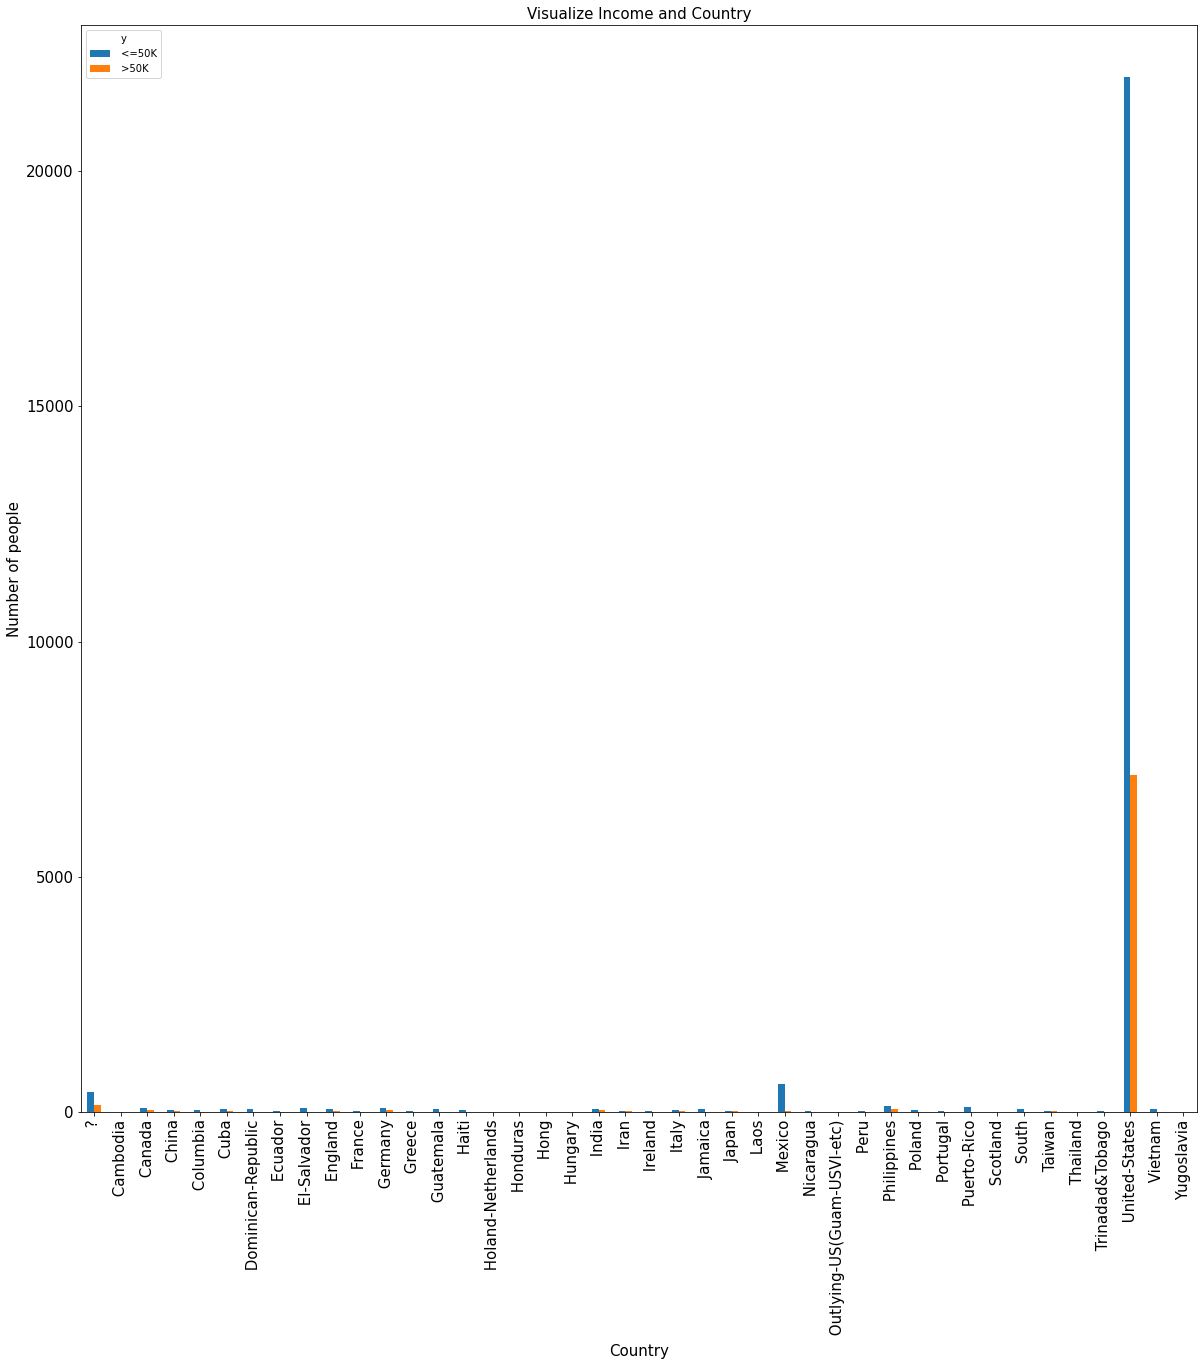

In [437]:
print('Bivariate analysis of Country and Income')
print('-----------------------------------------')
print(pd.crosstab(income_df[' country'],income_df['y']))
pd.crosstab(income_df[' country'],income_df['y']).plot(kind='bar',fontsize=15,figsize=(20,20))
plt.title('Visualize Income and Country',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people',fontsize=15)
plt.show()

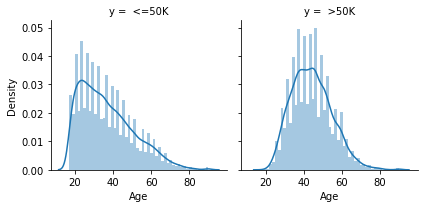

In [438]:
grid = sns.FacetGrid(income_df, col='y')
grid = grid.map(sns.distplot, "Age")

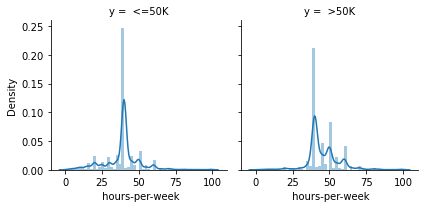

In [439]:
grid = sns.FacetGrid(income_df, col='y')
grid = grid.map(sns.distplot, " hours-per-week")

### Feature Encoding

In [440]:
cat_columns = ['Profession Class', ' Education', ' marital-status', ' occupation',' relationship', ' race', 'Gender', ' country']
df_dummy = pd.get_dummies(income_df, columns = cat_columns)
df_dummy

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,y,Profession Class_ ?,Profession Class_ Federal-gov,Profession Class_ Local-gov,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [441]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit_transform(df_dummy['y'])

array([0, 0, 0, ..., 0, 0, 1])

In [442]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 109 entries, Age to  country_ Yugoslavia
dtypes: int64(6), object(1), uint8(102)
memory usage: 4.9+ MB


In [443]:
X = df_dummy.drop("y",axis=1)
y = df_dummy["y"]

### Train and Test splitting

In [444]:
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26048, 108)
(6513, 108)
(26048,)
(6513,)


In [445]:
#Scale Data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Model

In [446]:
trees = 100
max_features = 3
results = []
names_of_models = []

model_list = [('LR', LogisticRegression()),
              ('KNN', KNeighborsClassifier()),
              ('DTC', DecisionTreeClassifier()),
              ('RFC', RandomForestClassifier(n_estimators=trees,max_features=3))]


for name, model in model_list:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names_of_models.append(name)
    res = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(res)

LR: 0.8513512358073066 (0.00651722547726918)
KNN: 0.8221360611608894 (0.006512284930651418)
DTC: 0.8172603642410465 (0.004751804932734459)
RFC: 0.8465141772144434 (0.005391694872183045)


# Random Forest Model Tune

In [447]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [448]:
importances = RFC.feature_importances_
print (pd.DataFrame(RFC.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
Final_census                          0.158878
Age                                   0.148649
 capital-gain                         0.092101
 hours-per-week                       0.086203
 Education-num                        0.060332
...                                        ...
 country_ Outlying-US(Guam-USVI-etc)  0.000032
 country_ Honduras                    0.000017
 occupation_ Armed-Forces             0.000011
Profession Class_ Never-worked        0.000002
 country_ Holand-Netherlands          0.000001

[108 rows x 1 columns]


In [449]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    print(importance)

Feature: 0, Score: 0.14558
[1.45576291e-01 1.57675235e-01 5.99804880e-02 9.64348499e-02
 3.04321423e-02 8.27096791e-02 1.96253713e-03 5.52584775e-03
 5.80471005e-03 3.96083087e-06 1.06689487e-02 5.89150414e-03
 8.59006649e-03 4.85076928e-03 6.00767340e-05 1.65469213e-03
 2.25480581e-03 8.27145814e-04 3.20492483e-04 7.80708873e-04
 2.18673093e-03 1.25591749e-03 2.50805621e-03 3.06878650e-03
 1.19091097e-02 3.44352319e-03 8.35262109e-03 7.46245601e-03
 3.76392012e-05 4.01637052e-03 5.62830169e-03 7.09536913e-03
 2.68501946e-04 6.00495493e-02 8.66159761e-04 2.48316327e-02
 1.63427155e-03 1.65783381e-03 1.91895271e-03 5.50827582e-03
 3.35799152e-06 7.03411790e-03 1.95013761e-02 3.92110769e-03
 3.23321374e-03 4.26959876e-03 7.10136490e-03 1.27582323e-04
 1.54838411e-02 2.94567718e-03 7.23729238e-03 5.16937546e-03
 4.73889923e-03 4.63836414e-02 9.29449373e-03 1.46283651e-03
 8.35883932e-03 5.30646577e-03 1.18974088e-02 1.18660936e-03
 3.14328399e-03 4.72387226e-03 7.98733687e-04 6.80801758e-

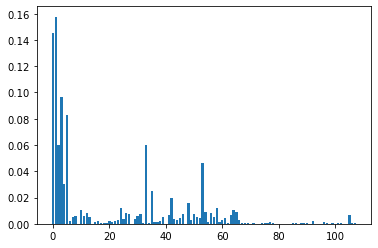

In [450]:
#plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [451]:
tuned_model_rf = RandomForestClassifier(n_estimators=20,max_features=5)
tuned_model_rf.fit(scaled_X_train, y_train)
predictions = tuned_model_rf.predict(scaled_X_test)

### Performance

In [452]:
accuracy_score(y_test,predictions)

0.8478427759864886

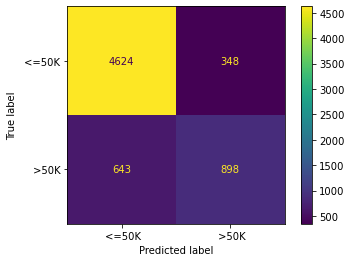

In [453]:
plot_confusion_matrix(tuned_model_rf,scaled_X_test,y_test)

In [454]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4972
        >50K       0.72      0.58      0.64      1541

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513



### Top 5 feature

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Age'),
  Text(1, 0, ' country_ Canada'),
  Text(2, 0, ' country_ Guatemala'),
  Text(3, 0, ' country_ Greece'),
  Text(4, 0, ' country_ Germany'),
  Text(5, 0, ' country_ France')])

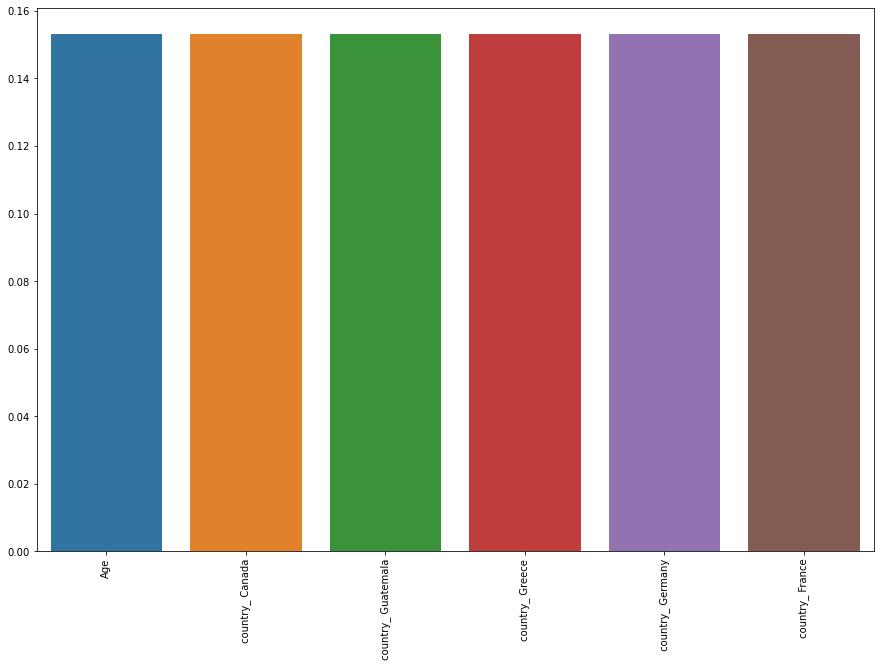

In [455]:
coefs = pd.Series(index=X.columns,data=tuned_model_rf.feature_importances_[0])
coefs = coefs.sort_values(ascending=False)[:6]

plt.figure(figsize=(15,10))
sns.barplot(x=coefs.index,y=coefs.values)
plt.xticks(rotation=90)

## Evaluating Curves and AUC

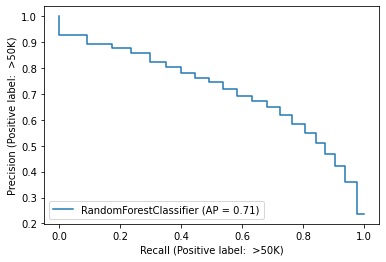

In [458]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(tuned_model_rf,scaled_X_test,y_test)

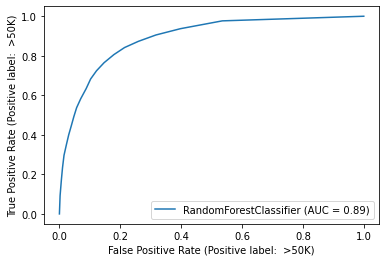

In [457]:
plot_roc_curve(tuned_model_rf,scaled_X_test,y_test)